In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Advertising.csv')

In [ ]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
x = np.array(data[['TV', 'Radio', 'Newspaper']])
y = np.array(data['Sales'])

# **1**

In [ ]:
mean = x.mean(axis=0)
std = x.std(axis=0)

In [ ]:
x = (x-mean)/std
x

In [ ]:
x = np.insert(x, 0, 1, axis=1)
x

# **2**

In [ ]:
def mserror(y, y_pred):
    return sum((y - y_pred)**2)/len(y)

In [ ]:
answer1 = mserror(y, y.mean())
print(answer1)

27.085743749999985


# **3**

In [ ]:
def normal_equation(x, y):
    return np.dot(np.linalg.pinv(x), y)

In [ ]:
norm_eq_weights = normal_equation(x, y)
print(norm_eq_weights)

[ 6.54585259e+02  3.35642264e+02  4.13494598e+01 -4.89631130e-01]


In [ ]:
answer2 = np.dot(np.mean(x, axis=0), norm_eq_weights)
print(answer2)

14.022499999998178


# **4**

In [ ]:
def linear_prediction(x, w):
    return np.dot(x, w)

In [ ]:
answer3 = mserror(y, linear_prediction(x, norm_eq_weights))
print(answer3)

2.7841263145109356


# **5**

In [ ]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad = [(linear_prediction(X[train_ind], w) - y[train_ind]) * 2 * X[train_ind][i] for i in range(len(X[0]))]
    return  w - eta * np.array(grad)

# **6**

In [ ]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        old_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)

        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mserror(y, np.dot(X, w)))
        iter_num += 1
        
    return w, errors

In [ ]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(x, y,
    np.ones((x.shape[1])), eta=1e-2, max_iter=10**4, verbose = True)

CPU times: user 882 ms, sys: 0 ns, total: 882 ms
Wall time: 885 ms


In [ ]:
stoch_grad_desc_weights

array([14.18840901,  3.63310309,  2.84644722, -0.0299736 ])

In [ ]:
stoch_errors_by_iter[:50]

[175.57082047241272,
 170.01075155032547,
 160.47224624525452,
 152.1132561836845,
 149.5163412918199,
 145.21672232188996,
 137.92464722831687,
 131.53441992435796,
 127.0662373867522,
 125.0393324156781,
 118.72694188970772,
 113.67913145340765,
 110.2933853131218,
 105.00372709808326,
 100.66120018375028,
 98.63781531719914,
 97.8827111753747,
 95.10546068599817,
 88.1711168424045,
 86.39349377487179,
 84.09834520257097,
 81.90758876702826,
 79.58246415904046,
 78.39734936228975,
 75.81680184207113,
 71.40418135132,
 68.69039161477328,
 66.23523566385693,
 63.63541355723224,
 61.769561057023786,
 61.14668979468868,
 59.790945211205496,
 55.100956730833715,
 52.13431547648269,
 49.136136550920895,
 47.16361058106579,
 46.27966724917689,
 45.539637299450995,
 44.2303621537776,
 43.64668955470891,
 43.02280919048171,
 42.416537002759576,
 39.17168337019125,
 37.13370886710617,
 37.63614997258262,
 37.2354386689361,
 36.877591010488125,
 35.692950511842135,
 34.90358319288952,
 34.38737

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'MSE')

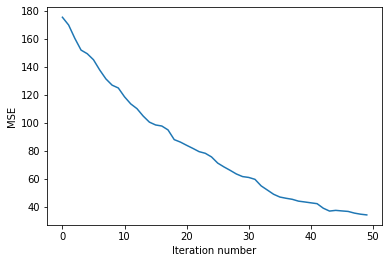

In [ ]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

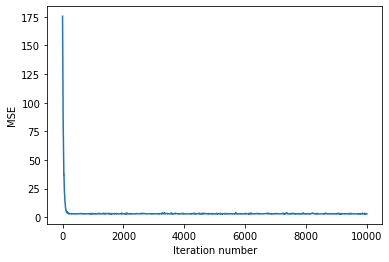

In [ ]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [ ]:
stoch_grad_desc_weights

array([14.18840901,  3.63310309,  2.84644722, -0.0299736 ])

In [ ]:
stoch_errors_by_iter[-1]

2.8947960045724916

In [ ]:
answer4 = mserror(y, linear_prediction(x, stoch_grad_desc_weights))
print(answer4)

2.8947960045724903
